<a href="https://colab.research.google.com/github/arasorietnom/StrokeHealthData-Clustering-Logistic-Regression/blob/main/STROKE_AND_HEALTH_DEMOGRAPHICS_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE AND HEALTH DEMOGRAPHICS**:

# Part 2: Logistic Regression

In [32]:
# General Libraries
import os
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from zipfile import ZipFile
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, BatchNormalization
from keras.models import Sequential

# PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Scikit-Learn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Statsmodels
import statsmodels.api as sm

In [33]:
from google.colab import files

uploaded = files.upload()

Saving Stroke Subset.csv to Stroke Subset (1).csv


In [34]:
df = pd.read_csv('/content/Stroke Subset.csv', delimiter=';') #previous "subset" df, with object transform and data pre-processing

In [35]:
df

,Male,Female,age,hypertension,heart_disease,Not married,Married,Private,Govt_job,Self-employed,...,bmi,never smoked,formerly smoked,smokes,unknown,stroke,Cluster Membership,Cluster,subset_cluster,pca_cluster
0,1,0,31,0,0,1,0,0,0,1,...,23,0,0,0,1,0,0,4,4,4
1,1,0,40,0,0,0,1,0,0,1,...,28,1,0,0,0,0,1,1,1,1
2,0,1,8,0,0,1,0,0,0,0,...,23,0,0,0,1,0,0,3,3,3
3,0,1,79,1,0,0,1,0,0,1,...,20,1,0,0,0,0,1,1,1,1
4,0,1,75,0,0,0,1,0,1,0,...,27,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,1,14,0,0,1,0,1,0,0,...,22,0,0,0,1,0,0,4,4,4
473,0,1,60,0,0,0,1,1,0,0,...,41,0,1,0,0,0,2,0,0,0
474,0,1,2,0,0,1,0,0,0,0,...,18,0,0,0,1,0,0,3,3,3
475,0,1,79,0,0,0,1,1,0,0,...,23,0,1,0,0,0,1,1,1,1


In [36]:
print(df.columns)

Index(['Male', 'Female', 'age', 'hypertension', 'heart_disease', 'Not married',
       'Married', 'Private', 'Govt_job', 'Self-employed', 'Children', 'Rural',
       'Urban', 'avg_glucose_level', 'bmi', 'never smoked', 'formerly smoked',
       'smokes', 'unknown', 'stroke', 'Cluster Membership', 'Cluster',
       'subset_cluster', 'pca_cluster'],
      dtype='object')


In [38]:
X = df.drop('stroke', axis=1)  # features
y = df['stroke']  # isolating target variable

In [39]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(X_train.dtypes) #type check

Male                  int64
Female                int64
age                   int64
hypertension          int64
heart_disease         int64
Not married           int64
Married               int64
Private               int64
Govt_job              int64
Self-employed         int64
Children              int64
Rural                 int64
Urban                 int64
avg_glucose_level     int64
bmi                   int64
never smoked          int64
formerly smoked       int64
smokes                int64
unknown               int64
Cluster Membership    int64
Cluster               int64
subset_cluster        int64
pca_cluster           int64
dtype: object


In [41]:
from sklearn.linear_model import LogisticRegression

# initializing the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increasing max_iter if convergence issues occur

# fitting model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Validity checks

Confusion Matrix

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# prediction on the testing set
y_pred = logreg.predict(X_test)

# confusion matrix for model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9513888888888888
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       137
           1       0.00      0.00      0.00         7

    accuracy                           0.95       144
   macro avg       0.48      0.50      0.49       144
weighted avg       0.91      0.95      0.93       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 600x600 with 0 Axes>

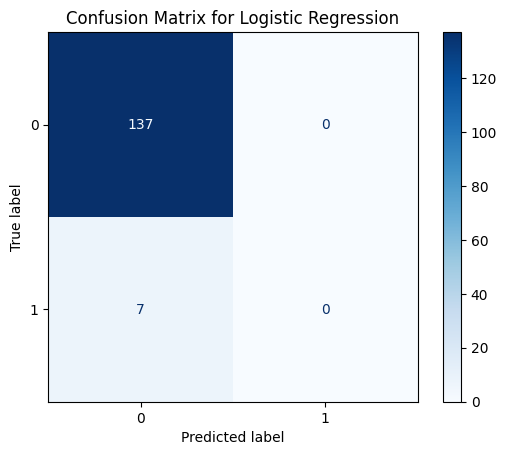

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

ROC Curve

<Figure size 800x600 with 0 Axes>

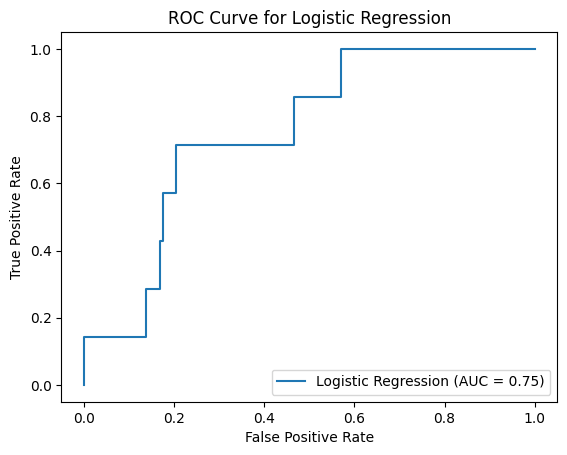

In [ ]:
#ROC curve
y_score = logreg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.title('ROC Curve for Logistic Regression')
plt.show()

Coefficients

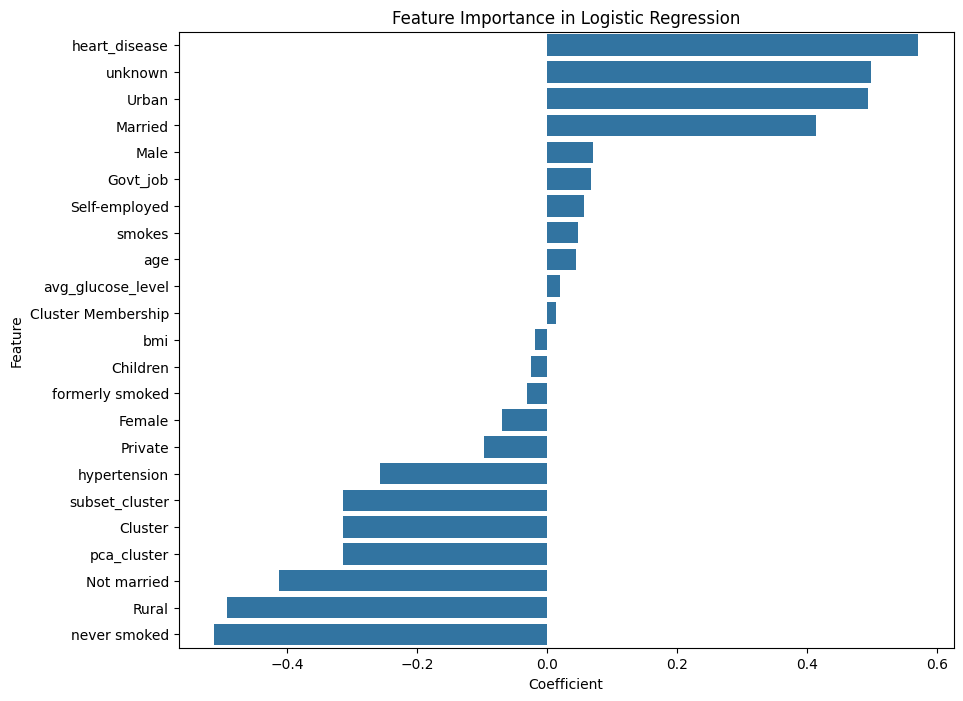

In [ ]:
#Feature Importance (Coefficient Analysis)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

Precision-Recall Curve

<Figure size 800x600 with 0 Axes>

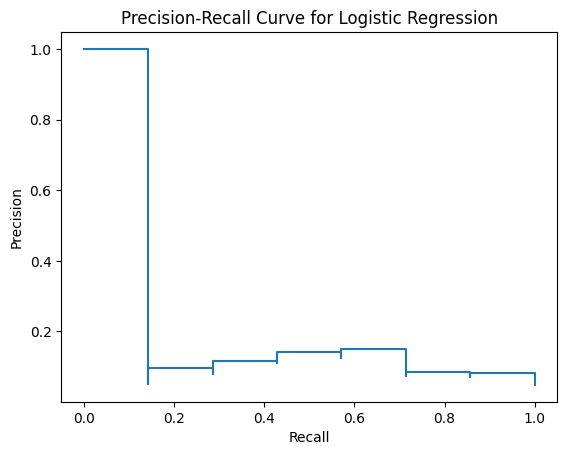

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Plot
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

Sensitivity and specificity

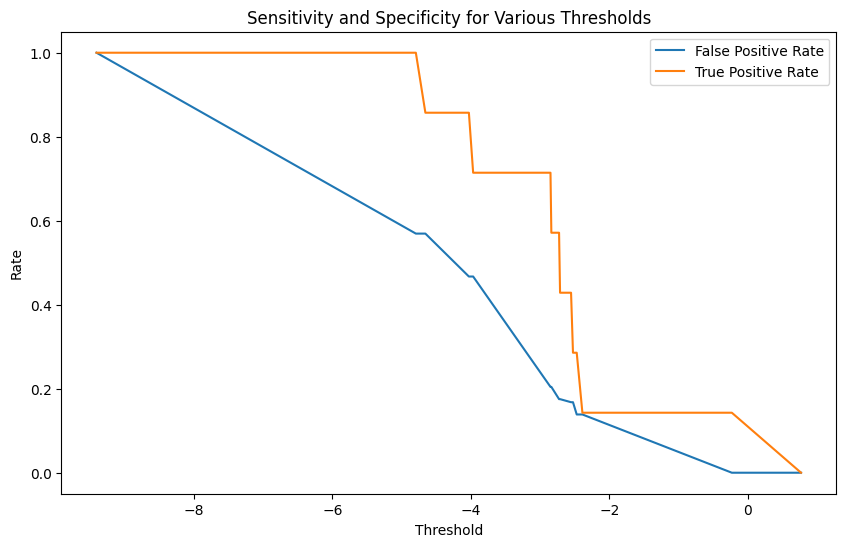

In [ ]:
# sensitivity and specificity for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)
threshold_df = pd.DataFrame({'Threshold': thresholds, 'FPR': fpr, 'TPR': tpr})

plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['FPR'], label='False Positive Rate')
plt.plot(threshold_df['Threshold'], threshold_df['TPR'], label='True Positive Rate')
plt.title('Sensitivity and Specificity for Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()